In [1]:
import pandas as pd
import numpy as np
import requests
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.preprocessing import label_binarize

from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
plt.style.use("seaborn")

/home/pnietoramos/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Defining Features and Classifier

In [2]:
df_common = pd.read_csv("Trees_clean.csv", index_col=False)

In [3]:
df_common.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,5,29


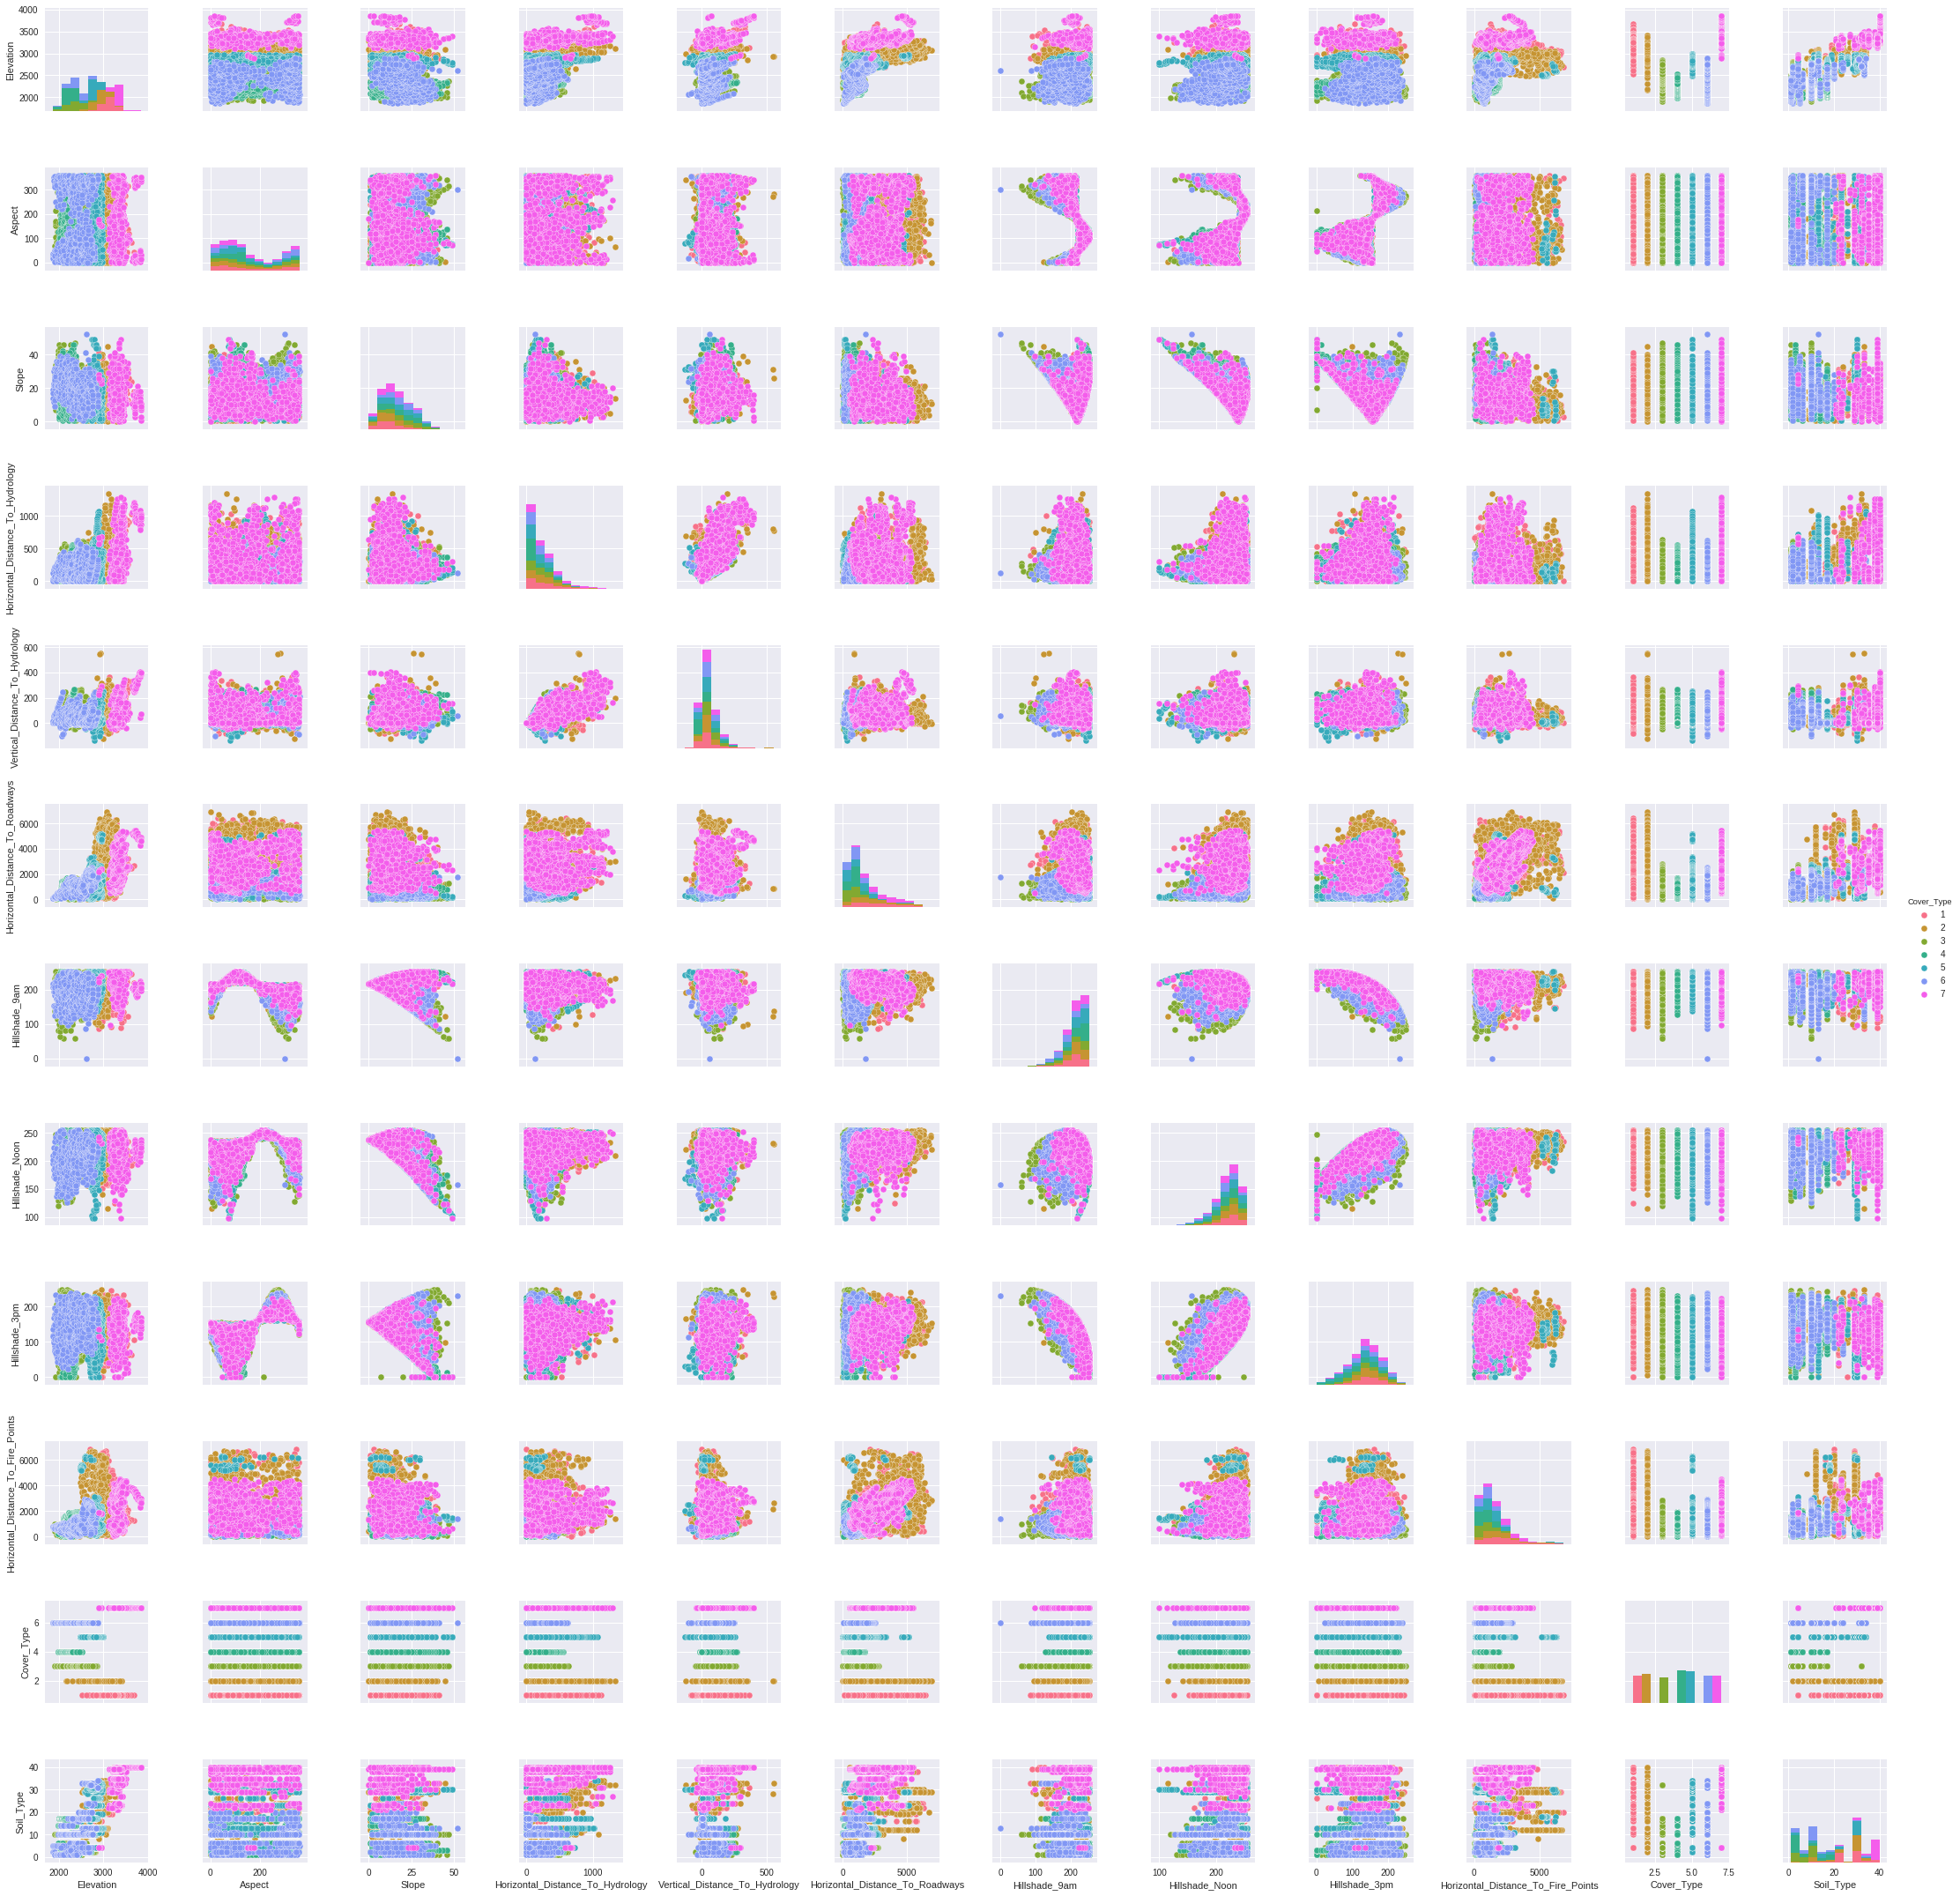

In [4]:
sns.pairplot(df_common.iloc[:10000,:], hue='Cover_Type');

In [61]:
X = df_common.drop("Cover_Type",axis=1)
y = df_common["Cover_Type"]

In [6]:
Counter(y)

Counter({1: 211840, 2: 283301, 3: 35754, 4: 2747, 5: 9493, 6: 17367, 7: 20510})

In [7]:
X.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,29


In [8]:
#Splitting the set (test = 0.3) in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,stratify=y, random_state=4444)

In [9]:
#scaling the features
sca = StandardScaler()
sca.fit_transform(X_train)
sca.transform(X_test);

In [10]:
# Scores for the test sets for an estimator
def alg_class(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    
    return acc
    #return ("Accuracy: " + str(acc)), ("Recall: " + str(rec)), ("Precision: " + str(prec)), ("F1: " + str(f1))

In [12]:
# Trying with nearest neighbors k = 1-40
acc_ =[]
k_ = []
for item in range(1,41):
    k_.append(int(item)) 
    acc = alg_class(KNeighborsClassifier(item), X_train, y_train, X_test, y_test)
    acc_.append(acc)

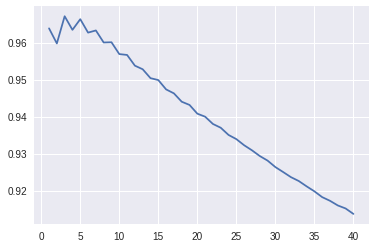

In [13]:
plt.plot(k_,acc_ );

### Choosing n=3 and plotting the results

In [32]:
def conf_trees(y, y_pred):
    trees_confusion = confusion_matrix(y, y_pred)
    plt.figure(dpi=180)
    sns.heatmap(trees_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
               xticklabels=["1","2","3","4","5","6","7"],
               yticklabels=["1","2","3","4","5","6","7"]);
    plt.xlabel('prediction')
    plt.ylabel('actual');

In [33]:
knn_3 = KNeighborsClassifier(3)
knn_3.fit(X_train, y_train)
y_pred = knn_3.predict(X_test)

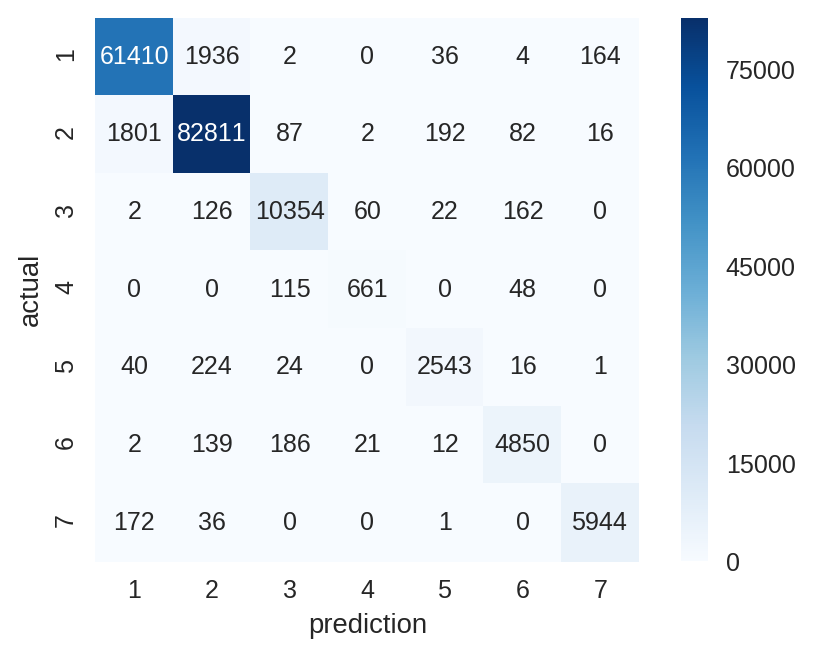

In [34]:
# Confusion matrix for the test set
conf_trees(y_test, y_pred)

Ploting ROC for the different cover_types

In [35]:
def ROC_cover(X_test, y_test, cover_type):
    y_test_bin = label_binarize(y_test, classes=[cover_type])
    fpr, tpr, thresholds = roc_curve(y_test_bin, knn_3.predict_proba(X_test)[:,cover_type-1])
    plt.plot(fpr, tpr,lw=2)
    plt.plot([0,1],[0,1],c='r',ls='--')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title("ROC curve for cover" + str(cover_type) + "classification");
    print("ROC AUC score = ", roc_auc_score(y_test_bin, knn_3.predict_proba(X_test)[:,cover_type-1]))

ROC AUC score =  0.9945664597334702


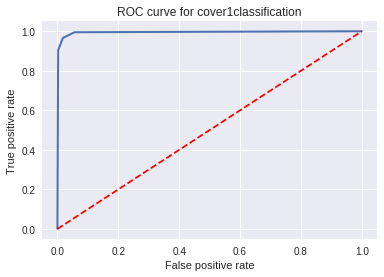

In [36]:
ROC_cover(X_test, y_test, 1)

ROC AUC score =  0.9941101688185264


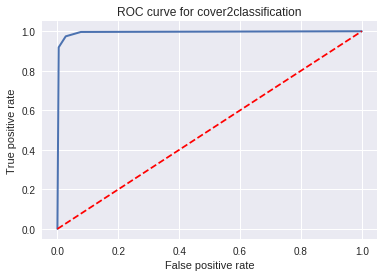

In [37]:
ROC_cover(X_test, y_test, 2)

ROC AUC score =  0.9959884089188653


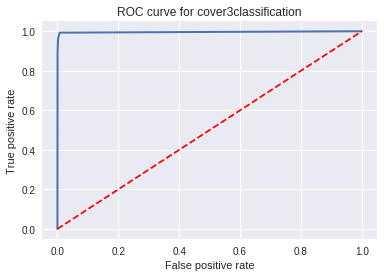

In [38]:
ROC_cover(X_test, y_test, 3)

ROC AUC score =  0.966973389954579


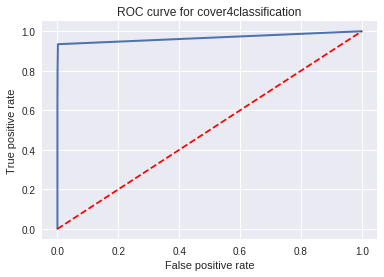

In [39]:
ROC_cover(X_test, y_test, 4)

ROC AUC score =  0.9892559294621007


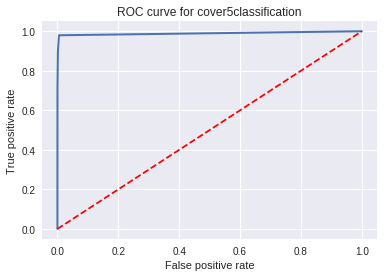

In [40]:
ROC_cover(X_test, y_test, 5)

ROC AUC score =  0.9924830110168027


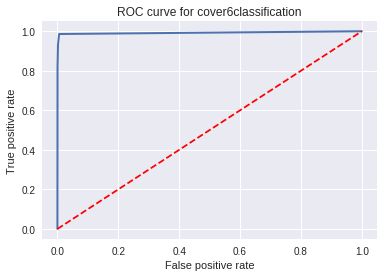

In [41]:
ROC_cover(X_test, y_test, 6)

ROC AUC score =  0.9979604518801096


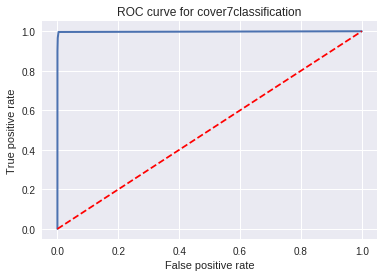

In [42]:
ROC_cover(X_test, y_test, 7)

Recall and precission for the different classes

In [43]:
print("Recall for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y_test, y_pred)[i,i]/len(y_test[y_test==(i+1)])))

Recall for cover:
Type 1:96.62953172205438
Type 2:97.43502253179749
Type 3:96.53179190751445
Type 4:80.21844660194175
Type 5:89.29073033707866
Type 6:93.09021113243762
Type 7:96.60328295140582


In [45]:
print("Precision for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y_test, y_pred)[i,i]/len(y_pred[y_pred==(i+1)])))

Precision for cover:
Type 1:96.81996626042537
Type 2:97.11394127028802
Type 3:96.1552748885587
Type 4:88.84408602150538
Type 5:90.6272273699216
Type 6:93.95583107322743
Type 7:97.04489795918367


### Training with the whole data set

In [27]:
knn_3 = KNeighborsClassifier(3)
knn_3.fit(X, y)
y_pred_all = knn_3.predict(X)
accuracy_score(y_pred_all,y)

0.9914872670443984

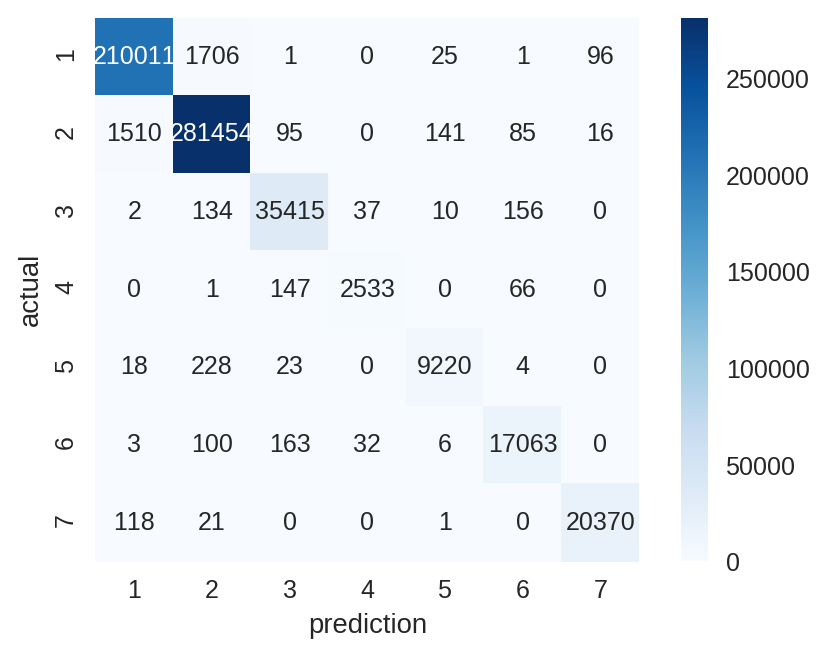

In [28]:
conf_trees(y, y_pred_all)

In [29]:
print("Recall for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y, y_pred_all)[i,i]/len(y[y==(i+1)])))

Recall for cover:
Type 1:99.13661253776435
Type 2:99.34804324728822
Type 3:99.05185433797617
Type 4:92.20968329086276
Type 5:97.1241967765722
Type 6:98.24955375136754
Type 7:99.31740614334471


In [31]:
print("Precision for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y, y_pred_all)[i,i]/len(y_pred_all[y_pred_all==(i+1)])))

Precision for cover:
Type 1:99.21998280277046
Type 2:99.22790540254685
Type 3:98.80314697020422
Type 4:97.34819369715603
Type 5:98.05381261299586
Type 6:98.20431654676258
Type 7:99.45317840054682


In [47]:
X_few = X.loc[:,"Elevation":"Horizontal_Distance_To_Roadways"]
X_few.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways
0,2596,51,3,258,0,510
1,2590,56,2,212,-6,390
2,2804,139,9,268,65,3180
3,2785,155,18,242,118,3090
4,2595,45,2,153,-1,391


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_few, y, test_size=.30,stratify=y, random_state=4444)

In [52]:
# Trying with nearest neighbors k = 1-40
acc_ =[]
k_ = []
for item in range(1,41):
    k_.append(int(item)) 
    acc = alg_class(KNeighborsClassifier(item), X_train, y_train, X_test, y_test)
    acc_.append(acc)

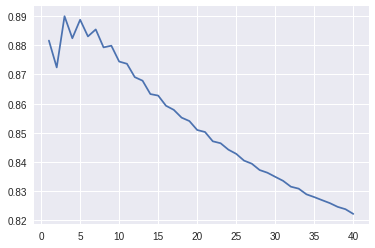

In [53]:
plt.plot(k_,acc_);

In [54]:
knn_3 = KNeighborsClassifier(3)
knn_3.fit(X_train, y_train)
y_pred = knn_3.predict(X_test)

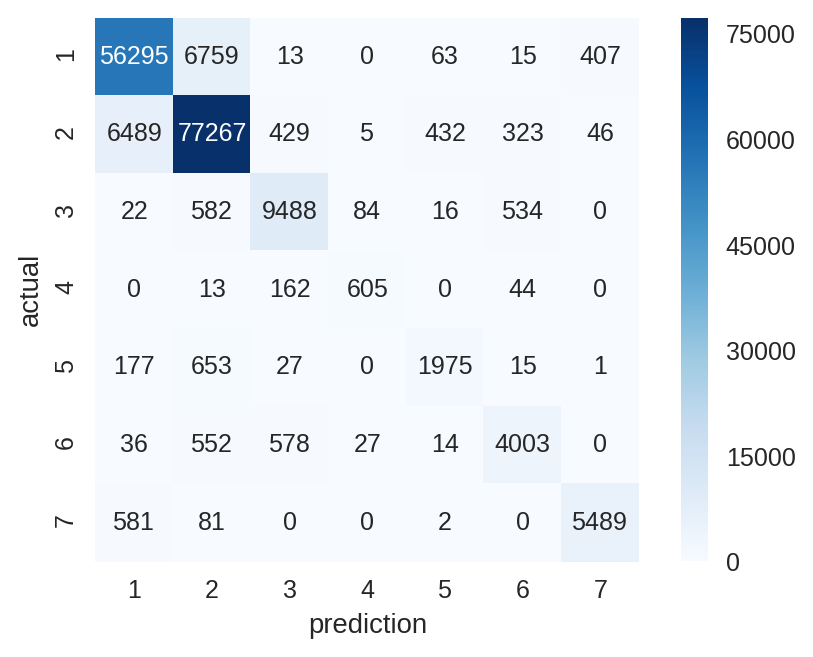

In [55]:
conf_trees(y_test, y_pred)

In [56]:
print("Recall for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y_test, y_pred)[i,i]/len(y_test[y_test==(i+1)])))

Recall for cover:
Type 1:88.58100453172206
Type 2:90.91197891541458
Type 3:88.45795263844863
Type 4:73.42233009708738
Type 5:69.34691011235955
Type 6:76.83301343570058
Type 7:89.20851617097351


In [58]:
print("Precision for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y_test, y_pred)[i,i]/len(y_pred[y_pred==(i+1)])))

Precision for cover:
Type 1:88.51415094339623
Type 2:89.94261235987754
Type 3:88.69776572870899
Type 4:83.91123439667129
Type 5:78.93685051958433
Type 6:81.13092825293879
Type 7:92.36076055864042


### Chose important features from random forest 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,stratify=y, random_state=4444)
col_in = ["Elevation","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points", "Soil_Type",
          "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"]
X_train_in = X_train[col_in]
X_test_in = X_test[col_in]

In [73]:
knn_3 = KNeighborsClassifier(3)
knn_3.fit(X_train_in, y_train)
y_pred = knn_3.predict(X_test_in)

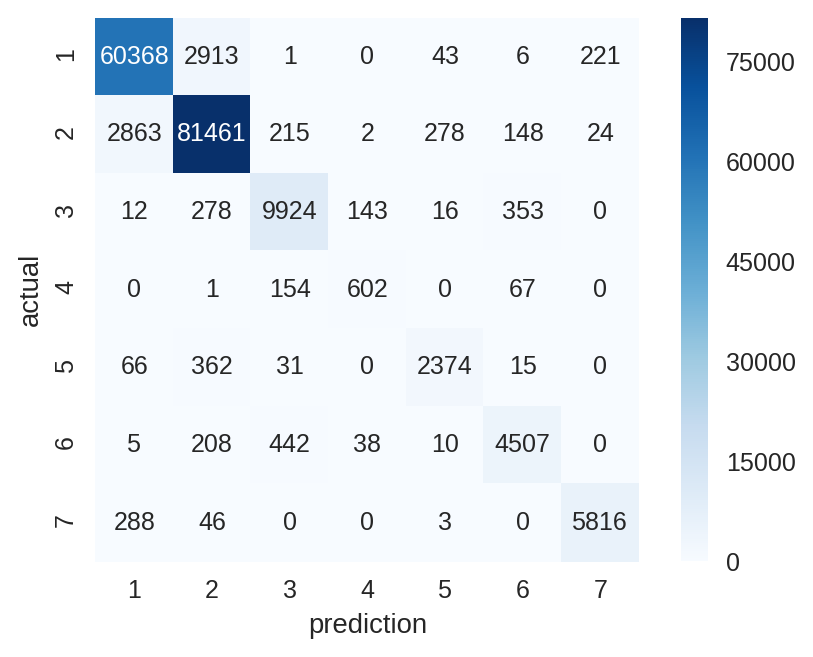

In [74]:
conf_trees(y_test, y_pred)

In [75]:
print("Recall for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y_test, y_pred)[i,i]/len(y_test[y_test==(i+1)])))

Recall for cover:
Type 1:94.98992950654582
Type 2:95.84661905378216
Type 3:92.52284169308223
Type 4:73.05825242718447
Type 5:83.3567415730337
Type 6:86.50671785028791
Type 7:94.52299691207541


In [76]:
print("Precision for cover:")
for i in range(7):
    print("Type " + str(i+1)+ ":" + str(100 * confusion_matrix(y_test, y_pred)[i,i]/len(y_pred[y_pred==(i+1)])))

Precision for cover:
Type 1:94.91525423728814
Type 2:95.53413315507395
Type 3:92.17052103650042
Type 4:76.68789808917198
Type 5:87.15124816446402
Type 6:88.44191522762951
Type 7:95.95776274542155
